In [97]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [98]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"device: {device}")

device: cuda


In [99]:
weight=0.7
bias=0.3

start=0
end=1
step=0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [100]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [101]:
def plot_predictions(X_train = X_train,
                     y_train = y_train,
                     X_test = X_test,
                     y_test = y_test,
                     pred = None):
    plt.scatter(X_train, y_train, c="blue", s=14)
    plt.scatter(X_test, y_test, c="green", s=14)

    if pred is not None:
        plt.scatter(X_test, pred, c="red", s=14)

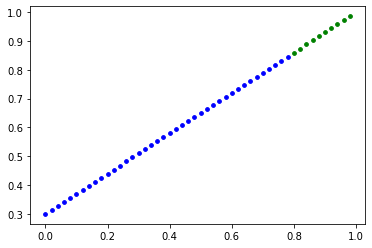

In [102]:
plot_predictions(X_train, y_train, X_test, y_test)

In [103]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [104]:
model0=LinearRegressionModel()

In [105]:
model0.state_dict()

OrderedDict([('weights', tensor([0.4740])), ('bias', tensor([0.1978]))])

In [106]:
with torch.inference_mode():
    pred=model0(X_test)

In [107]:
print(pred)

tensor([[0.5770],
        [0.5865],
        [0.5960],
        [0.6055],
        [0.6149],
        [0.6244],
        [0.6339],
        [0.6434],
        [0.6529],
        [0.6623]])


In [108]:
len(X_test), len(pred), pred

(10,
 10,
 tensor([[0.5770],
         [0.5865],
         [0.5960],
         [0.6055],
         [0.6149],
         [0.6244],
         [0.6339],
         [0.6434],
         [0.6529],
         [0.6623]]))

In [109]:
list(model0.parameters())

[Parameter containing:
 tensor([0.4740], requires_grad=True),
 Parameter containing:
 tensor([0.1978], requires_grad=True)]

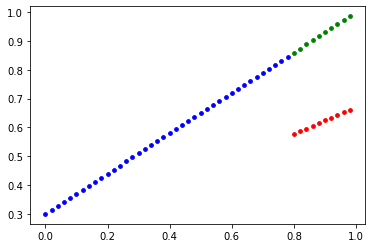

In [110]:
plot_predictions(X_train, y_train, X_test, y_test, pred)

In [111]:
loss_fn=nn.L1Loss()

optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.01)

In [112]:
list(model0.parameters())

[Parameter containing:
 tensor([0.4740], requires_grad=True),
 Parameter containing:
 tensor([0.1978], requires_grad=True)]

In [113]:
epochs = 100

for epoch in range(epochs):
    model0.train()

    pred=model0(X_train)

    loss = loss_fn(pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model0.eval()


    if epoch % 10 ==0:
        with torch.inference_mode():
            test = model0(X_test)

            test_loss = loss_fn(test, y_test.type(torch.float))

            print(f"Loss: {test_loss}")


Loss: 0.28984665870666504
Loss: 0.15513677895069122
Loss: 0.08125631511211395
Loss: 0.06282292306423187
Loss: 0.053176604211330414
Loss: 0.04490407183766365
Loss: 0.03731842711567879
Loss: 0.029045861214399338
Loss: 0.020773321390151978
Loss: 0.013187664560973644


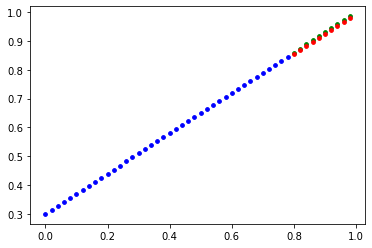

In [114]:
with torch.inference_mode():
    pred = model0(X_test)

plot_predictions(pred=pred.detach().numpy())

In [115]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [116]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

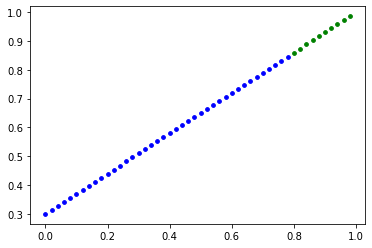

In [117]:
plot_predictions(X_train, y_train, X_test, y_test)

In [118]:
class LinearRegressionModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
    
torch.manual_seed(42)
model1 = LinearRegressionModel2()
model1, model1.state_dict()

(LinearRegressionModel2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [119]:
next(model1.parameters()).device

device(type='cpu')

In [120]:
model1.to(device)
next(model1.parameters()).device

device(type='cuda', index=0)

In [121]:
loss_fn1 = nn.L1Loss()
optimizer = torch.optim.SGD(params = model1.parameters(),
                            lr=0.01)

In [122]:
epochs = 1000

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model1.train()

    y_pred = model1(X_train)

    loss = loss_fn1(y_pred, y_train)

    optimizer.zero_grad()
    
    loss.backward()

    optimizer.step()

    if epoch % 100 == 0:
        model1.eval()
        with torch.inference_mode():
            test_pred = model1(X_test)
            
            test_loss = loss_fn1(test_pred, y_test)

        print(f"Loss: {test_loss}")

Loss: 0.5739762187004089
Loss: 0.014086711220443249
Loss: 0.013801801018416882
Loss: 0.013801801018416882
Loss: 0.013801801018416882
Loss: 0.013801801018416882
Loss: 0.013801801018416882
Loss: 0.013801801018416882
Loss: 0.013801801018416882
Loss: 0.013801801018416882


In [123]:
model1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [124]:
model1.eval()

with torch.inference_mode():
    y_pred=model1(X_test)
y_pred

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

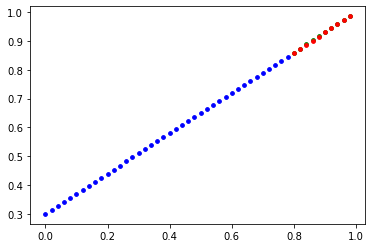

In [125]:
plot_predictions(pred = y_pred.cpu())